# Predicting Success Rate of a campaign in KickStarter

#### Data was taken from https://www.kaggle.com/yashkantharia/kickstarter-campaigns

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

##### Read the file, and take a quick look of the data.

In [2]:
ksDf = pd.read_csv('Kickstarter_projects_Feb19.csv')
ksDf.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [ ]:
city menasha dimana goalsnya harus lebih tinggi dari rata2 goals usd city shepperton

select * from ksDf where city = Menasha and goals_usd > (select avg(goals_usd) from ksDf where city = Shepperton)

Check the columns of the data

In [3]:
ksDf.columns

Index(['id', 'name', 'currency', 'main_category', 'sub_category',
       'launched_at', 'deadline', 'duration', 'goal_usd', 'city', 'state',
       'country', 'blurb_length', 'name_length', 'status', 'start_month',
       'end_month', 'start_Q', 'end_Q', 'usd_pledged'],
      dtype='object')

### Check the attribute of the data

In [4]:
ksDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192548 entries, 0 to 192547
Data columns (total 20 columns):
id               192548 non-null int64
name             192548 non-null object
currency         192548 non-null object
main_category    192548 non-null object
sub_category     192548 non-null object
launched_at      192548 non-null object
deadline         192548 non-null object
duration         192548 non-null float64
goal_usd         192548 non-null float64
city             192548 non-null object
state            192548 non-null object
country          192548 non-null object
blurb_length     192548 non-null int64
name_length      192548 non-null int64
status           192548 non-null object
start_month      192548 non-null int64
end_month        192548 non-null int64
start_Q          192548 non-null object
end_Q            192548 non-null object
usd_pledged      192548 non-null float64
dtypes: float64(3), int64(5), object(12)
memory usage: 29.4+ MB


In [5]:
ksDf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,192548.0,1.072709e+09,6.194810e+08,8624.00,5.348591e+08,1.074643e+09,1.607955e+09,2.147476e+09
duration,192548.0,3.236291e+01,1.161034e+01,1.00,3.000000e+01,3.000000e+01,3.400000e+01,9.300000e+01
goal_usd,192548.0,3.704990e+04,1.036236e+06,0.01,1.500000e+03,5.000000e+03,1.247057e+04,1.290333e+08
blurb_length,192548.0,1.893832e+01,4.976948e+00,1.00,1.600000e+01,2.000000e+01,2.200000e+01,3.500000e+01
name_length,192548.0,5.767897e+00,2.705431e+00,1.00,4.000000e+00,6.000000e+00,8.000000e+00,2.700000e+01
start_month,192548.0,6.512168e+00,3.324410e+00,1.00,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
end_month,192548.0,6.789845e+00,3.357369e+00,1.00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
usd_pledged,192548.0,1.371166e+04,9.078806e+04,0.00,1.490000e+02,1.783668e+03,7.146154e+03,8.596475e+06


### Replacing Status value to Numerical

In [6]:
ksDf['status'] = ksDf['status'].replace({'failed' : 0, 'successful': 1})
ksDf['status'].head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [7]:
ksDf['status']

0         1
1         1
2         1
3         1
4         1
         ..
192543    0
192544    0
192545    0
192546    0
192547    0
Name: status, Length: 192548, dtype: int64

### Checking the sum of the null values inside the data

In [8]:
ksDf.isna().sum()

id               0
name             0
currency         0
main_category    0
sub_category     0
launched_at      0
deadline         0
duration         0
goal_usd         0
city             0
state            0
country          0
blurb_length     0
name_length      0
status           0
start_month      0
end_month        0
start_Q          0
end_Q            0
usd_pledged      0
dtype: int64

## Data Visualization

In [9]:
print("Country Unique Value: ", len(ksDf['country'].unique()))
print("Status Unique Value: ", len(ksDf['status'].unique()))
print("Main Category Unique Value: ", len(ksDf['main_category'].unique()))

Country Unique Value:  22
Status Unique Value:  2
Main Category Unique Value:  15


In [10]:
ksDf['start_month'].dtype

dtype('int64')

### Distribution of Status

In [11]:
state = ksDf["status"].value_counts()

label = ['Successful', 'Failed']
value = list(state.values)

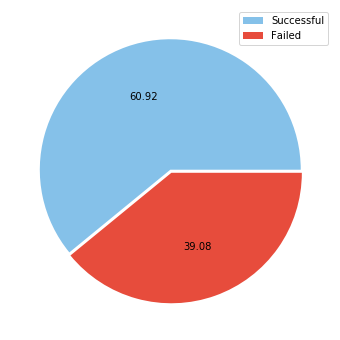

In [12]:
colors = ['#85C1E9', '#E74C3C']
plt.figure(figsize = (12,6))
plt.pie(value, autopct='%.2f',explode=[0,0.025], colors = colors)
plt.legend(['Successful', 'Failed'])
plt.show()

In [13]:
category = ksDf["main_category"].value_counts()

label = list(category.index)
value = list(ksDf["main_category"].value_counts())

### Distribution of Categories

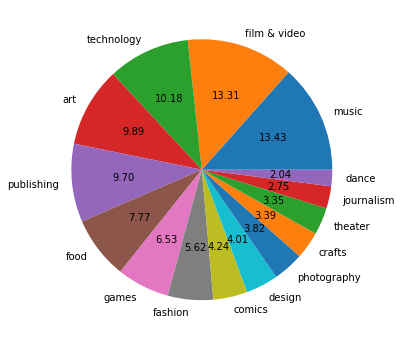

In [14]:
plt.figure(figsize = (18,6))
plt.pie(category.values,labels=label,autopct='%.2f')
plt.show()

In [15]:
main_category = ksDf["main_category"].value_counts()
main_category_failed = ksDf[ksDf["status"] == 0]["main_category"].value_counts()
main_category_success = ksDf[ksDf["status"] == 1]["main_category"].value_counts()
main_category_failed, main_category_success

(technology      11431
 film & video     9908
 food             9382
 music            8053
 art              7644
 publishing       5040
 games            4179
 fashion          3890
 journalism       3514
 photography      3313
 crafts           3106
 design           2213
 theater          1654
 comics           1289
 dance             625
 Name: main_category, dtype: int64, music           17797
 film & video    15714
 publishing      13636
 art             11399
 games            8388
 technology       8161
 fashion          6922
 comics           6879
 food             5579
 design           5506
 theater          4797
 photography      4033
 crafts           3424
 dance            3299
 journalism       1773
 Name: main_category, dtype: int64)

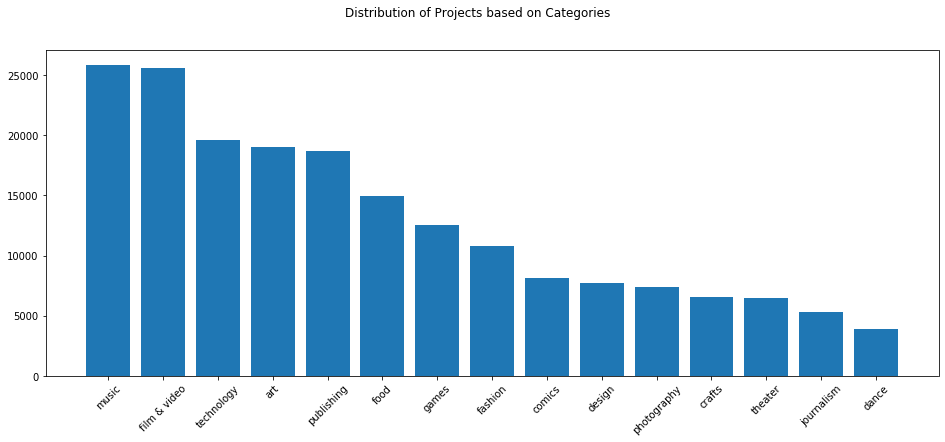

In [16]:
plt.figure(figsize=(16,6))
plt.suptitle('Distribution of Projects based on Categories')
plt.bar(main_category.index, main_category.values)
plt.xticks(rotation=45)
plt.show()

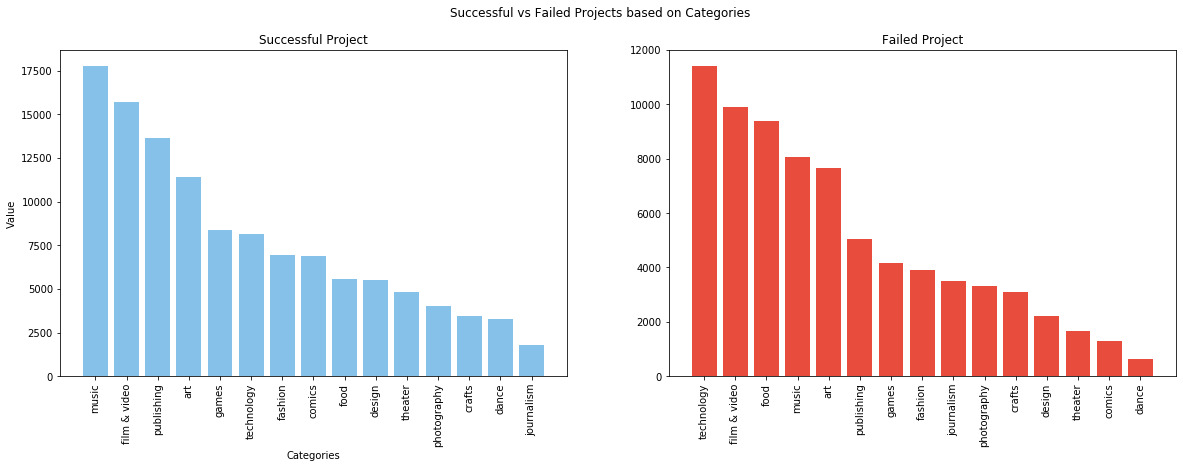

,comics,dance,theater,publishing,design,music,games,fashion,film & video,art,photography,crafts,technology,food,journalism
success,6879.00,3299.00,4797.00,13636.00,5506.00,17797.00,8388.00,6922.00,15714.00,11399.00,4033.0,3424.00,8161.00,5579.00,1773.00
failed,1289.00,625.00,1654.00,5040.00,2213.00,8053.00,4179.00,3890.00,9908.00,7644.00,3313.0,3106.00,11431.00,9382.00,3514.00
success_percentage,84.22,84.07,74.36,73.01,71.33,68.85,66.75,64.02,61.33,59.86,54.9,52.43,41.65,37.29,33.54
failed_percentage,15.78,15.93,25.64,26.99,28.67,31.15,33.25,35.98,38.67,40.14,45.1,47.57,58.35,62.71,66.46


In [17]:
plt.figure(figsize=(20,6))
plt.suptitle('Successful vs Failed Projects based on Categories')
plt.subplot(121)
plt.title('Successful Project')
plt.bar(main_category_success.index, main_category_success.values, color = '#85C1E9')
plt.xlabel('Categories')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.subplot(122)
plt.title('Failed Project')
plt.bar(main_category_failed.index,main_category_failed.values,color = '#E74C3C')
plt.xticks(rotation=90)

plt.show()

category_list = ksDf['main_category'].unique()
category_list.sort()

success_value_per_category = []
success_percentage_per_category = []
failed_value_per_category = []
failed_percentage_per_category = []

for i in category_list:
    total_per_category = main_category_success.loc[i] + main_category_failed.loc[i]
    success_value_per_category.append(main_category_success.loc[i])
    success_percentage_per_category.append(round(main_category_success.loc[i]/total_per_category*100 ,2))
    failed_value_per_category.append(main_category_failed.loc[i])
    failed_percentage_per_category.append(round(main_category_failed.loc[i]/total_per_category*100 ,2))
    
temp_df_success_category_percentage = pd.DataFrame(success_percentage_per_category, index = category_list, columns = ['success_percentage'])
temp_df_success_category = pd.DataFrame(success_value_per_category, index = category_list, columns = ['success'])
temp_df_failed_category = pd.DataFrame(failed_value_per_category, index = category_list, columns= ['failed'])
temp_df_failed_category_percentage = pd.DataFrame(failed_percentage_per_category, index = category_list, columns = ['failed_percentage'])

new_temp_df_category = pd.concat([temp_df_success_category, temp_df_failed_category, temp_df_success_category_percentage, temp_df_failed_category_percentage], axis = 1)
new_temp_df_category.sort_values('success_percentage', ascending=False).T

### Distribution of Projects based on Country

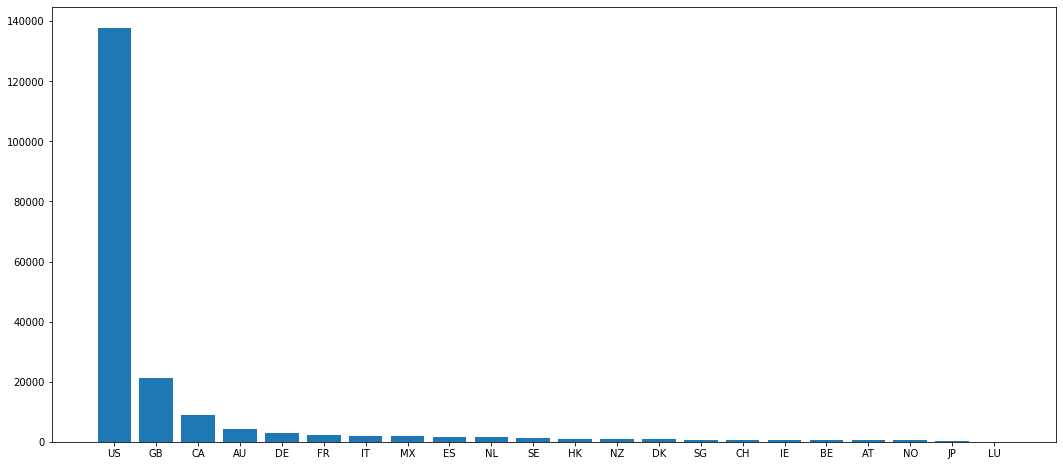

In [18]:
country = ksDf["country"].value_counts()

label = list(country.index)
value = list(country.values)

plt.figure(figsize = (18,8))
plt.bar(label, value)
plt.show()

In [53]:
countryValue = list(ksDf["country"].unique())

countryAverage = []

for i in countryValue:
    countryAverage.append(round(country.loc[i]/len(ksDf)*100 ,2))
    
temp_df_country = pd.DataFrame(countryAverage, index = countryValue, columns = ['percentage'])

temp_df_country

,percentage
US,71.59
GB,11.01
DE,1.57
CA,4.61
IT,1.06
NZ,0.44
FR,1.23
BE,0.26
ES,0.87
SE,0.66


In [54]:
country_failed = ksDf[ksDf["status"] == 0]["country"].value_counts()
country_success = ksDf[ksDf["status"] == 1]["country"].value_counts()

success_value_per_country = []
success_percentage_per_country = []
failed_value_per_country = []
failed_percentage_per_country = []

for i in countryValue:
    success_value_per_country.append(country_success.loc[i])
    success_percentage_per_country.append(round(country_success.loc[i]/len(ksDf)*100 ,2))
    success_value_per_country.append(country_failed.loc[i])
    failed_percentage_per_country.append(round(country_failed.loc[i]/len(ksDf)*100 ,2))
    
temp_df_success_country_percentage = pd.DataFrame(success_percentage_per_country, index = countryValue, columns = ['success_percentage'])
temp_df_success_county = pd.DataFrame(success_value_per_country, index = countryValue, columns = ['success'])
temp_df_failed_country = pd.DataFrame(failed_value_per_country, index = countryValue, columns= ['failed'])
temp_df_failed_country_percentage = pd.DataFrame(failed_percentage_per_country, index = countryValue, columns = ['failed_percentage'])

new_temp_df_country = pd.concat([temp_df_success_country, temp_df_failed_country, temp_df_success_country_percentage, temp_df_failed_country_percentage], axis = 1)
new_temp_df_country.sort_values('success_percentage', ascending=False).T

ValueError: Shape of passed values is (44, 1), indices imply (22, 1)

In [59]:
ksDf.groupby("country")["status"].mean().sort_values(ascending=False)

country
HK    0.794899
JP    0.741325
LU    0.666667
SG    0.659306
GB    0.652075
US    0.620066
DK    0.596852
NZ    0.578385
CA    0.578336
FR    0.569444
SE    0.563137
IE    0.531842
AU    0.528699
NO    0.511161
MX    0.509378
CH    0.494966
DE    0.489735
ES    0.482779
AT    0.469933
BE    0.462475
NL    0.455482
IT    0.357457
Name: status, dtype: float64

### Distribution of Goals

In [21]:
categories = list(ksDf['main_category'].unique())
successful_goals_mean = []
failed_goals_mean = []

for i in categories:
    successful_goals_mean.append(np.mean(ksDf[(ksDf['status'] == 1) & (ksDf['main_category'] == i)]['goal_usd']))
    failed_goals_mean.append(np.mean(ksDf[(ksDf['status'] == 0) & (ksDf['main_category'] == i)]['goal_usd']))

temp_failed_goals_df = pd.DataFrame(data = failed_goals_mean, index = categories, columns = ['failed'])
temp_successful_goals_df = pd.DataFrame(data = successful_goals_mean, index = categories, columns = ['success'])

mean_goals_df = pd.concat([temp_failed_goals_df, temp_successful_goals_df], axis = 1)

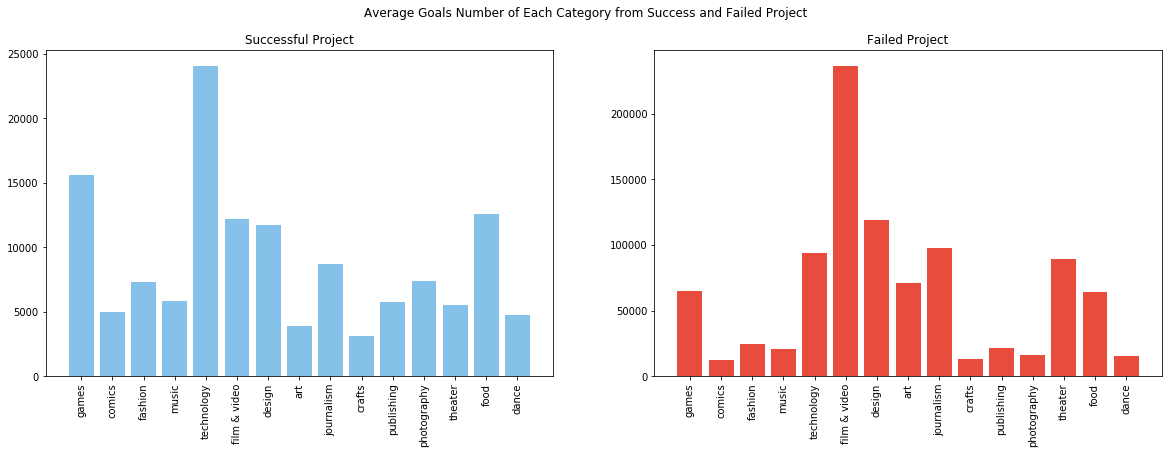

In [22]:
plt.figure(figsize=(20,6))
plt.suptitle('Average Goals Number of Each Category from Success and Failed Project')

plt.subplot(121)
plt.title('Successful Project')
plt.bar(mean_goals_df['success'].index, mean_goals_df['success'].values, color = '#85C1E9')
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Failed Project')
plt.bar(mean_goals_df['failed'].index,mean_goals_df['failed'].values,color = '#E74C3C')
plt.xticks(rotation=90)
plt.show()

### Distribution of Name Length of the Campaign

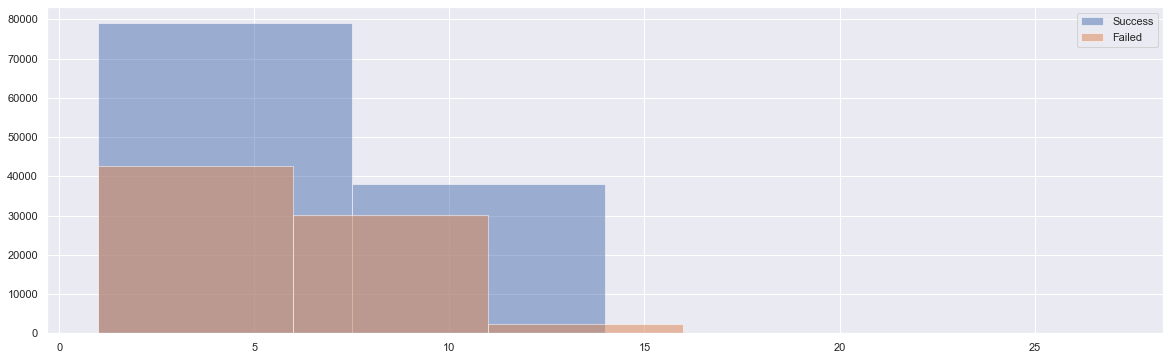

In [60]:
plt.figure(figsize=(20,6))
plt.hist(ksDf[ksDf['status']==1]['name_length'], bins=4, density=False, alpha = 0.5)
plt.hist(ksDf[ksDf['status']==0]['name_length'], bins=4, density=False, alpha = 0.5)
plt.legend(['Success', 'Failed'])

### Distribution based on Months

#### Renaming months so we could use it for later. 

In [24]:
mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep',
          10: 'Oct', 11: 'Nov', 12: 'Dec'}
ksDf['month'] = ksDf['start_month'].replace(mapping)

In [25]:
total_per_month = ksDf['month'].value_counts()
data_month_failed = ksDf[ksDf['status'] == 0]['month'].value_counts()
data_month_successful = ksDf[ksDf['status'] == 1]['month'].value_counts()

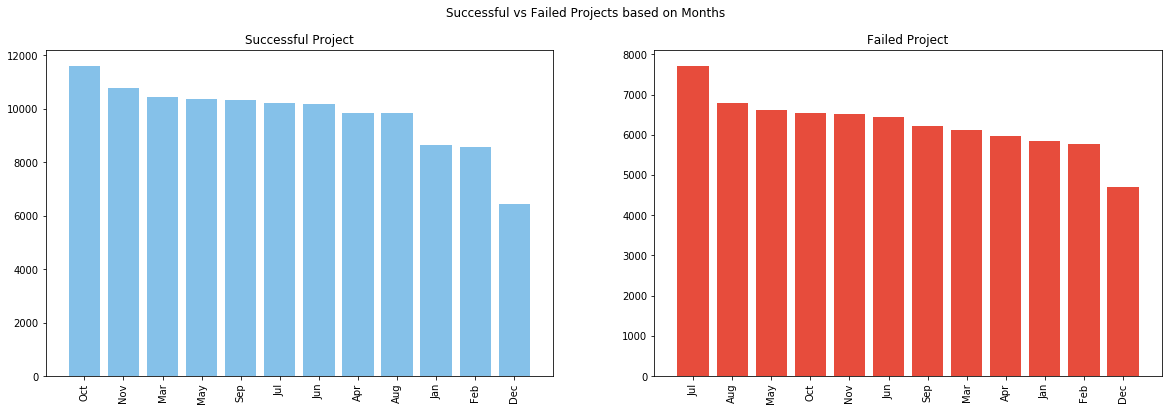

,Oct,Aug,Jun,Sep,Nov,Jan,Jul,Mar,Apr,Dec,Feb,May
success,11618.00,9833.00,10187.00,10337.00,10778.00,8655.00,10224.00,10442.00,9855.00,6435.00,8559.00,10384.00
failed,6537.00,6789.00,6435.00,6217.00,6516.00,5849.00,7720.00,6110.00,5978.00,4705.00,5772.00,6613.00
success_percentage,63.99,59.16,61.29,62.44,62.32,59.67,56.98,63.09,62.24,57.76,59.72,61.09
failed_percentage,36.01,40.84,38.71,37.56,37.68,40.33,43.02,36.91,37.76,42.24,40.28,38.91


In [26]:
plt.figure(figsize=(20,6))
plt.suptitle('Successful vs Failed Projects based on Months')
plt.subplot(121)
plt.title('Successful Project')
plt.bar(data_month_successful.index, data_month_successful.values, color = '#85C1E9')

plt.xticks(rotation=90)
plt.subplot(122)
plt.title('Failed Project')
plt.bar(data_month_failed.index,data_month_failed.values,color = '#E74C3C')

plt.xticks(rotation=90)
plt.show()

month_list = ksDf['month'].unique()

success_value_per_month = []
success_percentage_per_month = []
failed_value_per_month = []
failed_percentage_per_month = []

for i in month_list:
    success_value_per_month.append(data_month_successful.loc[i])
    success_percentage_per_month.append(round(data_month_successful.loc[i]/total_per_month.loc[i]*100 ,2))
    failed_value_per_month.append(data_month_failed.loc[i])
    failed_percentage_per_month.append(round(data_month_failed.loc[i]/total_per_month.loc[i]*100 ,2))
    
temp_df_pc_suc = pd.DataFrame(success_percentage_per_month, index = month_list, columns = ['success_percentage'])
temp_df_suc = pd.DataFrame(success_value_per_month, index = month_list, columns = ['success'])
temp_df_fai = pd.DataFrame(failed_value_per_month, index = month_list, columns= ['failed'])
temp_df_pc_fai = pd.DataFrame(failed_percentage_per_month, index = month_list, columns = ['failed_percentage'])

newTempDf = pd.concat([temp_df_suc, temp_df_fai, temp_df_pc_suc, temp_df_pc_fai], axis = 1)
newTempDf.T

#### Based on the percentage from table above, October hold the most number of successful campaign, and July hold the most number of failed campaign. We'll assume that months will impact the outcome as well.

##### Checking outliers from data

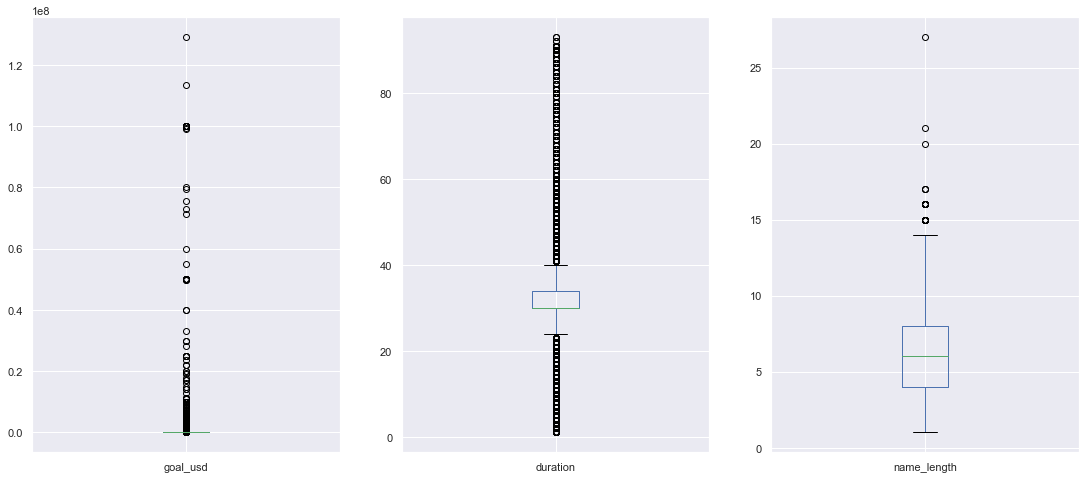

In [27]:
col = ['goal_usd', 'duration', 'name_length']

sb.set(style = "darkgrid")
fig = plt.figure(figsize = (32,8))

for i in range(len(col)):
    plt.subplot(1, 5, i+1)
    ksDf.boxplot(column=col[i])

### Checking the correlation between datas

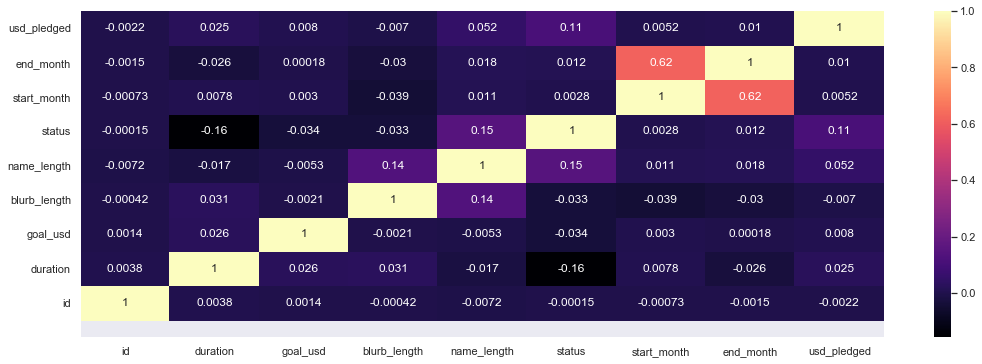

In [28]:
plt.figure(figsize = (18,6))
sb.heatmap(ksDf.corr(), annot=True, cmap = 'magma')
plt.ylim(-0.5, 9)
plt.show()

### We could see that start_month and end_month are highly correlated to each other

We'll drop end_month feature, because we'll never see a campaign based on what month will it stop, we could see the campaign period just based on start_month and duration only.

In [29]:
ksDf.drop(columns=['end_month'], inplace=True)

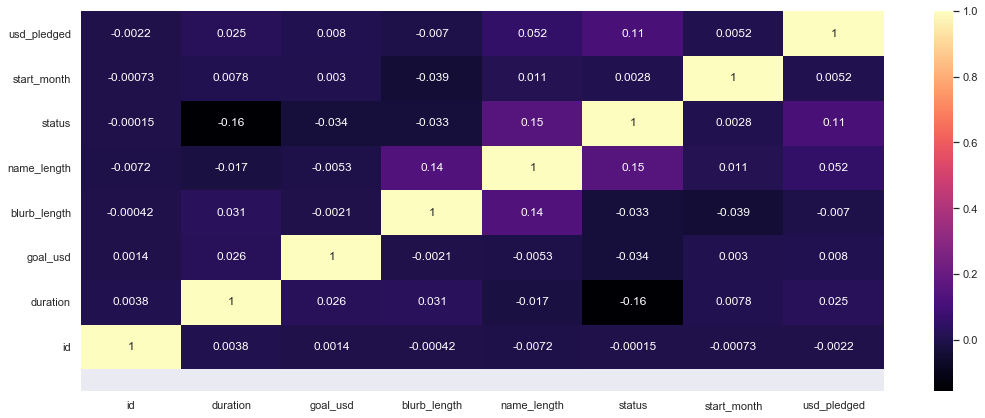

In [30]:
plt.figure(figsize = (18,7))
sb.heatmap(ksDf.corr(), annot=True, cmap = 'magma')
plt.ylim(-0.5, 8)
plt.show()

In [31]:
dummDf = pd.get_dummies(ksDf[['main_category', 'month', 'country']])
clDf = pd.concat([ksDf, dummDf], axis = 1)

In [32]:
diff_success_percentage = len(ksDf[(ksDf['usd_pledged'] >= ksDf['goal_usd'])])/len(ksDf)
diff_failed_percentage = 1 - diff_success_percentage

diff_success_percentage, diff_failed_percentage

(0.6037040114672705, 0.3962959885327295)

### Pledged amount is the key to the successful rate of the campaign, the campaign will be listed as successful if the pledged amount is equal or higher than the goals amount. Therefore, I'm considering to drop pledged amount feature.

### Remove unnecessary columns

In [33]:
clDf.drop(['state', 'id', 'city', 'launched_at', 'month', 'start_Q', 'end_Q', 'main_category', 'name', 'currency', 'country', 'sub_category', 'deadline', 'start_month', 'blurb_length', 'country', 'usd_pledged'], axis = 1, inplace = True)
clDf.head()

,duration,goal_usd,name_length,status,main_category_art,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,16.0,2000.00000,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,30.0,3870.99771,8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.0,1100.00000,7,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45.0,3500.00000,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,30000.00000,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Features that will be used:
- duration
- goal_usd
- name length
- status (target)
- main_category (dummied)
- start_month (dummied)
- country (dummied)

### Save the cleaned Dataset

In [61]:
clDf.to_csv('cleaned_kickstarter_dataset.csv', index = False)

In [62]:
clDf.columns

Index(['duration', 'goal_usd', 'name_length', 'status', 'main_category_art',
       'main_category_comics', 'main_category_crafts', 'main_category_dance',
       'main_category_design', 'main_category_fashion',
       'main_category_film & video', 'main_category_food',
       'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'country_AT',
       'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE',
       'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK',
       'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX',
       'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG',
       'country_US'],
    